In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing training set
dataset_train=pd.read_csv('C:\\Users\\Aayush Kandpal\\Downloads\\tesla_train.csv')
traininng_set=dataset_train.iloc[:,1:2].values

In [3]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(traininng_set)


In [4]:
#Sclaed values of TSLA stock pricest
training_set_scaled

array([[0.07466307],
       [0.0745444 ],
       [0.07780809],
       ...,
       [0.82724767],
       [0.82659493],
       [1.        ]])

In [5]:
x_train=[]
y_train=[]
for i in range(50,1235):
    x_train.append(training_set_scaled[i-50:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)


In [6]:
training_set_scaled.shape

(1235, 1)

In [7]:
x_train

array([[0.07466307, 0.0745444 , 0.07780809, ..., 0.04565234, 0.04792045,
        0.04553366],
       [0.0745444 , 0.07780809, 0.0723554 , ..., 0.04792045, 0.04553366,
        0.04781496],
       [0.07780809, 0.0723554 , 0.06176649, ..., 0.04553366, 0.04781496,
        0.04548751],
       ...,
       [0.43075666, 0.42715008, 0.47002004, ..., 0.74792965, 0.83253554,
        0.83252894],
       [0.42715008, 0.47002004, 0.40396128, ..., 0.83253554, 0.83252894,
        0.82724767],
       [0.47002004, 0.40396128, 0.3683572 , ..., 0.83252894, 0.82724767,
        0.82659493]])

In [8]:
x_train.shape

(1185, 50)

In [11]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [14]:
# Building a function Recurrent Neural Network with Keras
# Dropout is being used to prevent overfitting

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [203]:
#Initialisation 
# Adding layers and definig the model
# this model has 5 hidden layers 

# Initialisation
reg=Sequential()

#Layer 1
reg.add(LSTM(units=100,return_sequences=True,input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))
#Layer 2
reg=Sequential()
reg.add(LSTM(units=100,return_sequences=True))
reg.add(Dropout(0.2))
#Layer 3
reg=Sequential()
reg.add(LSTM(units=100,return_sequences=True))
reg.add(Dropout(0.2))
#Layer 4
reg=Sequential()
reg.add(LSTM(units=100,return_sequences=True))
reg.add(Dropout(0.2))
#Layer 5
reg=Sequential()
reg.add(LSTM(units=100))
reg.add(Dropout(0.2))

# Final Output layer
reg.add(Dense(units=1))

In [204]:
# Compiling our neural network by choosing our loss functions and optimizer 
# Adam optimizer 
reg.compile(optimizer='adam',loss='mean_squared_error')


In [205]:
# Training the model on the training data
reg.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 1s 19ms/step - loss: 0.0046
Epoch 2/100
38/38 [==============================] - 1s 18ms/step - loss: 7.7764e-04
Epoch 3/100
38/38 [==============================] - 1s 19ms/step - loss: 7.4984e-04
Epoch 4/100
38/38 [==============================] - 1s 20ms/step - loss: 6.3019e-04
Epoch 5/100
38/38 [==============================] - 1s 20ms/step - loss: 7.2436e-04
Epoch 6/100
38/38 [==============================] - 1s 21ms/step - loss: 6.7501e-04
Epoch 7/100
38/38 [==============================] - 1s 21ms/step - loss: 5.7699e-04
Epoch 8/100
38/38 [==============================] - 1s 21ms/step - loss: 5.4595e-04
Epoch 9/100
38/38 [==============================] - 1s 21ms/step - loss: 4.8671e-04
Epoch 10/100
38/38 [==============================] - 1s 21ms/step - loss: 5.2495e-04
Epoch 11/100
38/38 [==============================] - 1s 21ms/step - loss: 4.4829e-04
Epoch 12/100
38/38 [==============================] - 1s 21ms/step 

In [166]:
# Predictions
# Import the real values of 2020 July 14 -August 14
dataset_test=pd.read_csv('C:\\Users\\Aayush Kandpal\\Downloads\\tesla_test.csv')
test_set=dataset_test.iloc[:,1:2].values


In [167]:
test_set

array([[1556.      ],
       [1543.      ],
       [1477.160034],
       [1513.449951],
       [1519.01001 ],
       [1639.930054],
       [1599.      ],
       [1678.949951],
       [1416.01001 ],
       [1435.      ],
       [1504.      ],
       [1501.      ],
       [1488.      ],
       [1515.      ],
       [1449.199951],
       [1495.01001 ],
       [1492.98999 ],
       [1490.829956],
       [1499.540039],
       [1448.      ],
       [1396.      ],
       [1470.      ],
       [1611.      ],
       [1664.98999 ]])

In [206]:
# We cannot directly scale the test values. Hence, we will first concanteneate witht the original train data and then scacle
# this way the scaling factor for both the test and train data remains the same
total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=total[len(total)-len(dataset_test)-50:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
# Creating a datastructure for predicting the on the test data which contains 24 days
x_test=[]
for i in range(50,74):
    x_test.append(inputs[i-50:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stockprices=reg.predict(x_test)

# using the inverse transform to get our real values back from the scacled values
predicted_stockprices=sc.inverse_transform(predicted_stockprices)




In [207]:
predicted_stockprices

array([[1631.3735],
       [1632.8218],
       [1603.5469],
       [1535.2891],
       [1536.951 ],
       [1547.1754],
       [1646.1216],
       [1651.9822],
       [1707.7006],
       [1518.4059],
       [1454.4792],
       [1496.7903],
       [1520.4883],
       [1517.9728],
       [1535.1206],
       [1490.8556],
       [1506.9229],
       [1515.9148],
       [1517.6334],
       [1524.4608],
       [1487.3226],
       [1432.0083],
       [1469.1525],
       [1599.5226]], dtype=float32)

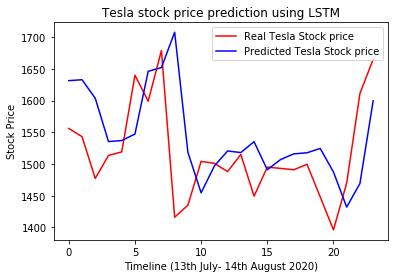

In [208]:
# Visualising the results
plt.plot(test_set,color='red',label='Real Tesla Stock price')
plt.plot(predicted_stockprices,color='blue',label='Predicted Tesla Stock price')
plt.title('Tesla stock price prediction using LSTM')
plt.xlabel('Timeline (13th July- 14th August 2020)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()




In [209]:
# Root mean squared error

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set, predicted_stockprices))
print(rmse)

88.08932424902632


In [210]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(test_set,predicted_stockprices)
mae



63.44877118066406

In [ ]:
# In Stock price prediction RMSE is not the right metric to judge the accuracy of the model as RMSE is dependent 
# on the values of the output . A small difference is heavily penalised.
# Hence, after doing some research of my own I have found that relative error would be a better option.
# Even MAPE ( Mean absolute percentage error is a good measure I have not used MAPE as it is still in develeopment stage 
#           on sklearn and the beta version is unstable . It divides by zero . Please read the documenetation)
#  upvote if you liked the project. This is just a basic model and there is much more that can be done.


    